# Columbia University FinTech Program: Project 2

### Team Members:
#### Corey Recai
#### Whelan Power
#### Rachel Solomon
#### Ernest Subah

##### Objective: < TBD >

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
get_ipython().run_line_magic("matplotlib", "inline")
import spacy
import spacy
import alpaca_trade_api as tradeapi
from spacy import displacy
from datetime import date, datetime, timedelta
nlp = spacy.load("en_core_web_sm")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
import re
import nltk
nltk.download("vader_lexicon")
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esuba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load Bitcoin file and Get Returns for Past xxx years
bitcoin_price = pd.read_csv(Path('Kraken_BTCUSD.csv'))

bitcoin_price.head(10)

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,7/2/2020,BTCUSD,9234.5,9269.2,9207.9,9207.9,393.65,3638576.38
1,7/1/2020,BTCUSD,9133.9,9300.3,9094.2,9234.5,3526.90,32493548.69
2,6/30/2020,BTCUSD,9183.5,9199.0,9061.3,9133.9,2685.90,24568044.42
3,6/29/2020,BTCUSD,9113.7,9230.0,9013.0,9183.5,4167.45,38044216.83
4,6/28/2020,BTCUSD,9002.0,9189.3,8937.5,9113.7,2563.55,23264322.25
5,6/27/2020,BTCUSD,9150.3,9183.3,8812.8,9002.0,4250.28,38322054.84
6,6/26/2020,BTCUSD,9233.5,9285.0,9028.6,9150.3,5300.72,48566374.72
7,6/25/2020,BTCUSD,9282.0,9337.5,8992.4,9233.5,6244.42,57446412.92
8,6/24/2020,BTCUSD,9622.3,9661.7,9200.0,9282.0,5937.47,55703453.17
9,6/23/2020,BTCUSD,9694.0,9721.3,9575.8,9622.3,3628.24,34974789.86


In [3]:
# Drop Bitcoing symbol, open, high, low and Volume USD
bitcoin_price.drop(columns=['Symbol','Volume USD'], inplace=True)

In [4]:
bitcoin_price.head(10)

,Date,Open,High,Low,Close,Volume BTC
0,7/2/2020,9234.5,9269.2,9207.9,9207.9,393.65
1,7/1/2020,9133.9,9300.3,9094.2,9234.5,3526.90
2,6/30/2020,9183.5,9199.0,9061.3,9133.9,2685.90
3,6/29/2020,9113.7,9230.0,9013.0,9183.5,4167.45
4,6/28/2020,9002.0,9189.3,8937.5,9113.7,2563.55
5,6/27/2020,9150.3,9183.3,8812.8,9002.0,4250.28
6,6/26/2020,9233.5,9285.0,9028.6,9150.3,5300.72
7,6/25/2020,9282.0,9337.5,8992.4,9233.5,6244.42
8,6/24/2020,9622.3,9661.7,9200.0,9282.0,5937.47
9,6/23/2020,9694.0,9721.3,9575.8,9622.3,3628.24


In [5]:
bitcoin_price.tail(10)

,Date,Open,High,Low,Close,Volume BTC
2440,10/15/2013,135.59,153.00,133.88,133.88,4.30
2441,10/14/2013,131.84,135.59,131.84,135.59,12.01
2442,10/13/2013,127.00,131.84,127.00,131.84,0.10
2443,10/12/2013,125.86,127.50,125.86,127.00,4.00
2444,10/11/2013,125.86,125.86,125.86,125.86,0.00
2445,10/10/2013,123.84,125.86,123.84,125.86,2.00
2446,10/9/2013,124.18,124.18,123.84,123.84,2.82
2447,10/8/2013,123.61,124.19,123.61,124.18,3.99
2448,10/7/2013,122.00,123.61,122.00,123.61,0.10
2449,10/6/2013,238.00,238.00,122.00,122.00,0.10


In [6]:
bitcoin_price['month'] = pd.to_datetime(bitcoin_price['Date']).dt.month
bitcoin_price['year'] = pd.to_datetime(bitcoin_price['Date']).dt.year

In [9]:
bitcoin_price = bitcoin_price[['month', 'year', 'Close', 'Volume BTC']]
bitcoin_price.head(10)

,month,year,Close,Volume BTC
0,7,2020,9207.9,393.65
1,7,2020,9234.5,3526.90
2,6,2020,9133.9,2685.90
3,6,2020,9183.5,4167.45
4,6,2020,9113.7,2563.55
5,6,2020,9002.0,4250.28
6,6,2020,9150.3,5300.72
7,6,2020,9233.5,6244.42
8,6,2020,9282.0,5937.47
9,6,2020,9622.3,3628.24


In [10]:
bitcoin_price = bitcoin_price.groupby(['year','month'])['Close', 'Volume BTC'].mean()

In [11]:
bitcoin_price.head(10)

Close  Volume BTC
year month                        
2013 10     157.503462   17.912523
     11     545.946333   33.560333
     12     795.705806   44.567419
2014 1      831.454839   23.316774
     2      667.814286   31.096786
     3      603.351935   13.635806
     4      468.432333   13.903137
     5      489.022581    9.305716
     6      612.934667   15.210683
     7      618.785484    6.349924

In [12]:
# Create a new column for price returns
bitcoin_price['Price_Returns'] = bitcoin_price.Close.pct_change()

# Create a new column for Adoption Rate
bitcoin_price['Adoption_Rate'] = bitcoin_price['Volume BTC'].pct_change()

In [13]:
bitcoin_price.head(10)

Close  Volume BTC  Price_Returns  Adoption_Rate
year month                                                      
2013 10     157.503462   17.912523            NaN            NaN
     11     545.946333   33.560333       2.466250       0.873568
     12     795.705806   44.567419       0.457480       0.327979
2014 1      831.454839   23.316774       0.044927      -0.476820
     2      667.814286   31.096786      -0.196812       0.333666
     3      603.351935   13.635806      -0.096527      -0.561504
     4      468.432333   13.903137      -0.223617       0.019605
     5      489.022581    9.305716       0.043956      -0.330675
     6      612.934667   15.210683       0.253387       0.634553
     7      618.785484    6.349924       0.009546      -0.582535

In [14]:
bitcoin_price = bitcoin_price.dropna()
bitcoin_price.head()

Close  Volume BTC  Price_Returns  Adoption_Rate
year month                                                      
2013 11     545.946333   33.560333       2.466250       0.873568
     12     795.705806   44.567419       0.457480       0.327979
2014 1      831.454839   23.316774       0.044927      -0.476820
     2      667.814286   31.096786      -0.196812       0.333666
     3      603.351935   13.635806      -0.096527      -0.561504

In [15]:
Adoption_Rate_Sentiment = []
tempdf = pd.DataFrame(bitcoin_price['Adoption_Rate'])

for index, row in tempdf.iterrows():
  #print(row)
  if (row >= 0).bool():
    Adoption_Rate_Sentiment.append(1)
  else:
    Adoption_Rate_Sentiment.append(-1)

bitcoin_price['Adoption_Sentiment'] = Adoption_Rate_Sentiment

bitcoin_price.tail(20)

Close    Volume BTC  Price_Returns  Adoption_Rate  \
year month                                                             
2018 12      3660.961290  10809.249677      -0.315361       0.420798   
2019 1       3658.887097   5676.563871      -0.000567      -0.474842   
     2       3659.517857   5037.871786       0.000172      -0.112514   
     3       3870.152632   3066.398947       0.057558      -0.391330   
     4       5145.396667   6688.315667       0.329507       1.181163   
     5       7290.680645   9762.940968       0.416933       0.459701   
     6       9396.356667   9015.924667       0.288817      -0.076515   
     7      10668.674194   8513.994194       0.135405      -0.055672   
     8      10631.609677   5779.655806      -0.003474      -0.321158   
     9       9790.593333   5091.644333      -0.079105      -0.119040   
     10      8382.764516   5464.444194      -0.143794       0.073218   
     11      8336.563333   4527.781000      -0.005511      -0.171411   
     12      7244.661290   4116.247097      -0.130977      -0.090891   
2020 1       8369.129032   5874.012903       0.155213       0.427031   
     2       9639.193103   4580.181724       0.151756      -0.220264   
     3       6874.983871  12572.352903      -0.286768       1.744946   
     4       7222.033333   8800.528333       0.050480      -0.300009   
     5       9257.038710   8811.408387       0.281777       0.001236   
     6       9478.633333   5290.551000       0.023938      -0.399579   
     7       9221.200000   1960.275000      -0.027159      -0.629476   

            Adoption_Sentiment  
year month                      
2018 12                      1  
2019 1                      -1  
     2                      -1  
     3                      -1  
     4                       1  
     5                       1  
     6                      -1  
     7                      -1  
     8                      -1  
     9                      -1  
     10                      1  
     11                     -1  
     12                     -1  
2020 1                       1  
     2                      -1  
     3                       1  
     4                      -1  
     5                       1  
     6                      -1  
     7                      -1

In [19]:
y = bitcoin_price["Adoption_Sentiment"]
X = bitcoin_price.drop(columns=["Adoption_Rate", "Volume BTC", "Adoption_Sentiment"])

In [20]:
y.head(5)

year  month
2013  11       1
      12       1
2014  1       -1
      2        1
      3       -1
Name: Adoption_Sentiment, dtype: int64

In [21]:
X.head(5)

Close  Price_Returns
year month                           
2013 11     545.946333       2.466250
     12     795.705806       0.457480
2014 1      831.454839       0.044927
     2      667.814286      -0.196812
     3      603.351935      -0.096527

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(60, 2)

In [23]:
y_train.shape

(60,)

In [24]:
X_test.shape

(21, 2)

In [25]:
y_test.shape

(21,)

In [26]:
# Create the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Fit/Train the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Score/Validate the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6333333333333333
Testing Data Score: 0.42857142857142855


In [29]:
# Make Predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,-1
1,1,-1
2,1,1
3,1,-1
4,1,1
5,1,-1
6,1,1
7,-1,1
8,1,1
9,1,1


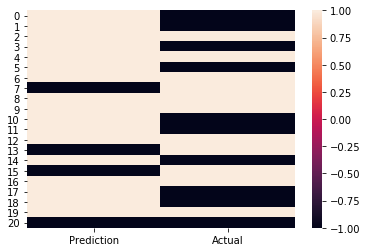

In [30]:
import seaborn as sns
sns.heatmap(results)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1, 9],
       [3, 8]], dtype=int64)

In [42]:
# Load Bitcoin/crypto news file and Get news for Past xxx years
bitcoin_news = pd.read_csv(Path('NYT_news_bitcoin.csv'))

bitcoin_news.head(10)

,published_date,snippet,lead_paragraph,headline
0,2017-08-03T20:18:38+0000,After years as a niche market for technologica...,"Most readers have probably heard of Bitcoin, t...",Grandpa Had a Pension. This Generation Has Cry...
1,2018-07-29T20:16:47+0000,With their eyes on blockchain jobs and revenue...,SAN FRANCISCO — Hedge funds go to the Cayman I...,"Have a Cryptocurrency Company? Bermuda, Malta ..."
2,2020-02-12T22:29:15+0000,The rules will improve transparency in hopes o...,WASHINGTON — The Trump administration plans to...,Treasury to Roll Out Cryptocurrency Rules
3,2018-11-21T22:38:57+0000,"A year ago, Bitcoin and other digital currenci...",SAN FRANCISCO — The news on Wall Street this w...,5 Reasons Cryptocurrency Prices Are Plunging A...
4,2018-09-25T19:15:56+0000,"When it comes to Bitcoin and the like, governm...",Cryptocurrencies like Bitcoin have lost over h...,The Trouble With Cryptocurrency’s Viral Growth
5,2018-08-20T09:00:07+0000,The number of people who bought virtual curren...,"SAN FRANCISCO — Pete Roberts of Nottingham, En...",After the Bitcoin Boom: Hard Lessons for Crypt...
6,2019-07-15T23:14:52+0000,The Treasury secretary raised concerns about c...,WASHINGTON — Treasury Secretary Steven Mnuchin...,Cryptocurrencies Pose National Security Threat...
7,2019-01-10T13:07:46+0000,The police have been investigating the woman’s...,OSLO — The wife of a wealthy Norwegian busines...,Cryptocurrency Ransom Demanded for Wife of Nor...
8,2018-01-30T21:47:13+0000,The social network said it wanted to prevent m...,SAN FRANCISCO — Want to get rich quick through...,Facebook Bans Ads for Bitcoin and Other Crypto...
9,2018-03-30T23:01:02+0000,"From Bitcoin to Litecoin to Ethereum, we expla...","From Bitcoin to Litecoin to Ethereum, we expla...",Baffled by Bitcoin? How Cryptocurrency Works
